# Setup

In [1]:
exp_directory = 'results'
agent_name = 'DoubleDeepQAgent'
game_name = 'Breakout'
env_name = '-v4'
render_mode='rgb_array'
fps = None # 60

In [2]:
game = game_name + env_name
game

'Breakout-v4'

### Global Modules

In [3]:
%matplotlib inline
import pandas as pd
import os
import sys
import gym
from gym.wrappers import Monitor

### Local Modules

In [4]:
import base
from src.agents import (
    DeepQAgent,
    DoubleDeepQAgent
)
from src.downsamplers import (
    downsample_pong,
    downsample_breakout,
    downsample_space_invaders
)

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Constants

In [5]:
# a mapping of string names to agents
agents = {
    'DeepQAgent': DeepQAgent,
    'DoubleDeepQAgent': DoubleDeepQAgent,
}

# down-samplers for each game
downsamplers = {
    'Pong': downsample_pong,
    'Breakout': downsample_breakout,
    'SpaceInvaders': downsample_space_invaders,
}

In [6]:
exp_directory = '{}/{}/{}'.format(exp_directory, game_name, DoubleDeepQAgent.__name__)
if not os.path.exists(exp_directory):
    raise ValueError('{} not found!'.format(repr(exp_directory)))
# set up the weights file
weights_file = '{}/weights.h5'.format(exp_directory)
# make sure the weights exist
if not os.path.exists(weights_file):
    raise ValueError('{} not found!'.format(repr(weights_file)))

# Environment

In [7]:
env = gym.make(game)
env = Monitor(env, '{}/monitor'.format(exp_directory), force=True)

In [8]:
env.observation_space

Box(210, 160, 3)

In [9]:
env.action_space

Discrete(4)

# Agent

In [10]:
agent = agents[agent_name](env, downsamplers[game_name],
    replay_memory_size=0,
    render_mode='rgb_array',
)
agent.model.load_weights(weights_file)
agent

DoubleDeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<Breakout-v4>>>>,
    downsample=Downsampler(y=(32, 14), x=(8, 8), cut=[142]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x123471da0>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x11cd03048>,
    image_size=(84, 84),
    render_mode='rgb_array',
    target_update_freq=10000
)

In [11]:
scores = agent.play(fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [10:20<00:00,  6.21s/game]


0     54.0
1     52.0
2     46.0
3     34.0
4     52.0
5     40.0
6     30.0
7     48.0
8     37.0
9     37.0
10    31.0
11    53.0
12    70.0
13    47.0
14    58.0
15    42.0
16    65.0
17    49.0
18    51.0
19    55.0
20    62.0
21    39.0
22    47.0
23    58.0
24    55.0
25    64.0
26    30.0
27    57.0
28    35.0
29    42.0
      ... 
70    67.0
71    45.0
72    75.0
73    45.0
74    45.0
75    40.0
76    51.0
77    35.0
78    78.0
79    45.0
80    33.0
81    55.0
82    60.0
83    67.0
84    38.0
85    42.0
86    64.0
87    54.0
88    38.0
89    55.0
90    33.0
91    53.0
92    46.0
93    69.0
94    43.0
95    47.0
96    42.0
97    67.0
98    52.0
99    47.0
Length: 100, dtype: float64

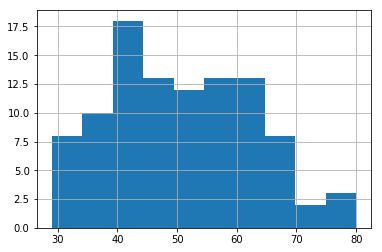

In [12]:
_ = scores.hist()

In [13]:
scores.describe()

count    100.000000
mean      50.640000
std       11.877761
min       29.000000
25%       41.000000
50%       50.500000
75%       60.250000
max       80.000000
dtype: float64